In [7]:
import os
print(os.getcwd())
path_to_files = 'Files/'

c:\Users\jesse\Desktop\bachelor-internship\code\Long_FXT\Long_FXT


### Temporal indices (Fig. 2) - Structured-jet models with $\theta_{W}/\theta_{C}$ = 2.0

C:\Users\jesse\AppData\Local\Temp\ipykernel_8044\3975393377.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis_r', len(Q))
C:\Users\jesse\AppData\Local\Temp\ipykernel_8044\3975393377.py:193: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


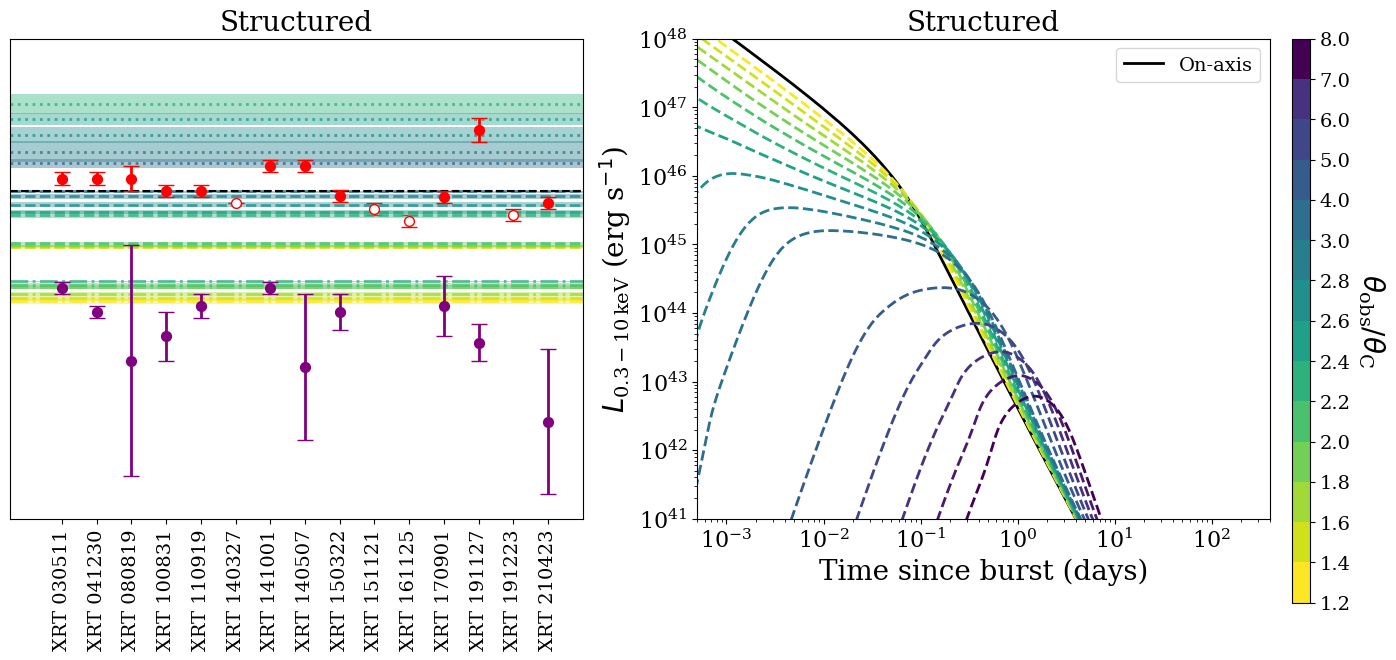

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
from pylab import *
import matplotlib.gridspec as gridspec
import astropy.units as u
from astropy.cosmology import Planck18 as cosmo
import afterglowpy as grb
from scipy.stats import norm


z = 0.9224
dL = np.array(cosmo.luminosity_distance(z))*3.085e24
nuX = 2.418e18
Gamma = 1.67
E1 = 0.3
E2 = 10
h = 4.1356676966e-18
conv = (E2**(2-Gamma) - E1**(2-Gamma))/(h*(2-Gamma)*E2**(1-Gamma))
lum_fac = 4*np.pi*(dL**2)*(1+z)**(Gamma-2)*conv*1e-26
ta = 10
tb = 1e4*86400
t = np.geomspace(ta, tb, num=1000)
tday = t * grb.sec2day


# FXTs
DF = pd.read_excel(path_to_files+'FXTs.xlsx', sheet_name=0, usecols='A,B,F:I')
DF.columns = ['XRT','ID','a1','a1_err','a2','a2_err']
DF = DF[(DF['ID']==1) | (DF['ID'] > 6)]

# Colors upper panels
c0 = 'teal'
c1 = 'gold'
c2 = 'blue'

Q = [1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 4, 5, 6, 7, 8]
cmap = cm.get_cmap('viridis_r', len(Q)) 
Norm = matplotlib.colors.BoundaryNorm(Q, cmap.N)


fig = plt.figure(figsize=(18,6))

bottom, top = 0.1, 0.9
left, right = 0.1, 0.8

fig.subplots_adjust(top=top, bottom=bottom, left=left, right=right, hspace=0.1, wspace=0.2)

for num in range(2):
    ax = fig.add_subplot(1,2,num+1)
        
    # PANEL 1
   
    if num == 0: 
        
        for q in Q:

            
            DF1 = pd.read_csv(path_to_files+'A-0-2-20.csv', index_col=0)
            DF2 = pd.read_csv(path_to_files+'A-angles-20.csv', index_col=0)
            DFSGRB = pd.concat([DF1, DF2])
            DFSGRB = DFSGRB[DFSGRB['q']==q]

            F0 = DFSGRB[DFSGRB['Pre-peak slope']!=0]
            mean0s = np.mean(F0['Pre-peak slope'])
            neg0s = np.mean(F0['APP_neg'])
            pos0s = np.mean(F0['APP_pos'])

            F1 = DFSGRB[DFSGRB['Intermediate slope']!=0]
            mean1s = np.mean(F1['Intermediate slope'])
            neg1s = np.mean(F1['APR_neg'])
            pos1s = np.mean(F1['APR_pos'])

            F2 = DFSGRB[DFSGRB['Post-break slope']!=0]
            mean2s = np.mean(F2['Post-break slope'])
            neg2s = np.mean(F2['APB_neg'])
            pos2s = np.mean(F2['APB_pos'])
        
            # Pre-peak: if theta_obs/thetaC <= 2, alpha_pre-peak = alpha_intermediate, only plot one for better visibility
            if q > 2:
                plt.axhspan(mean0s-neg0s, mean0s+pos0s, color=cmap.colors[Q.index(q)], alpha=0.4, lw=0)
                plt.axhline(mean0s, color=cmap.colors[Q.index(q)], linestyle = 'dotted', alpha=0.8, lw=2)
             
            # Intermediate
            plt.axhspan(mean1s-neg1s, mean1s+pos1s, color=cmap.colors[Q.index(q)], alpha=0.4, lw=0)
            plt.axhline(mean1s, color=cmap.colors[Q.index(q)], linestyle = '--', alpha=0.8, lw=2)
        
            # Post-break
            plt.axhspan(mean2s-neg2s, mean2s+pos2s, color=cmap.colors[Q.index(q)], alpha=0.4, lw=0)
            plt.axhline(mean2s, color=cmap.colors[Q.index(q)], linestyle = '-.', alpha=0.8, lw=2)
        
        # FXTs
        cmf = plt.get_cmap('gist_stern')
        ax.set_prop_cycle('color', [cmf(1.*i/17) for i in range(17)])
        for i in [1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]:
            df = DF[DF['ID']==i]
            
            # SPL
            if i in [13, 17, 18, 21]: 
                ax.scatter(df['XRT'], -df['a1'], s=50, facecolors='white', edgecolors='r', zorder=10)
                ax.errorbar(df['XRT'], -df['a1'], yerr = df['a1_err'], color = 'red', fmt = ".", capsize = 6, linewidth = 2, alpha=1, zorder=0)        
            
            # BPL
            if i in [7, 8, 9, 10, 12, 14, 15, 16, 19, 20, 22]:
                # First index
                ax.scatter(df['XRT'], -df['a1'], color = 'red', s=50, zorder=10)
                ax.errorbar(df['XRT'], -df['a1'], yerr = df['a1_err'], color = 'red', fmt = ".", capsize = 6, linewidth = 2, alpha=1, zorder=10)        
                # Second index
                ax.scatter(df['XRT'], -df['a2'], color = 'purple', s=50, zorder=10)
                ax.errorbar(df['XRT'], -df['a2'], yerr = df['a2_err'], color = 'purple', fmt = ".", capsize = 6, linewidth = 2, alpha=1, zorder=10)        
                
        
        ax.xaxis.set_tick_params(rotation=90, labelsize = 14)
        ax.yaxis.set_tick_params(left = False, right = False, labelleft = False, labelright = False)
        ax.set_xlim([-1.5,15])
        ax.set_ylim([-5.4,2.5])
        ax.set_title('Structured', fontsize = 20)

        plt.axhline(0, color='black', linestyle = '--')
        
    
   # PANEL 2: 

    if num == 1: 
        
        res = np.array([0.008, 5.27379622e+01, 0.009, 0.02, -2.34480800e+00, 2.34763257e+00, -6.88314426e-01, -2.98233955e+00])

        Z = {'jetType':   0,
             'specType':  0,
             'thetaObs':  res[0],
             'E0':        10**(res[1]),
             'thetaCore': res[2],
             'thetaWing': res[3],
             'n0':        10**(res[4]),
             'p':         res[5],
             'epsilon_e': 10**(res[6]),
             'epsilon_B': 10**(res[7]),
             'xi_N':      1.0,
             'd_L':       dL,
             'z':         z}
        
        Fnu = grb.fluxDensity(t, nuX, **Z)
        Flux = conv*Fnu*1e-26
        Lum = lum_fac * Fnu
        ax.plot(tday, Lum, color = 'black', linewidth = 2, linestyle='-', label = 'On-axis')
        ax.legend(fontsize = 14)   
    
        # Off-axis:

        for q in Q:
            
            Z = {'jetType':   0,
                 'specType':  0,
                 'thetaObs':  q*res[2],
                 'E0':        10**(res[1]),
                 'thetaCore': res[2],
                 'thetaWing': res[3],
                 'n0':        10**(res[4]),
                 'p':         res[5],
                 'epsilon_e': 10**(res[6]),
                 'epsilon_B': 10**(res[7]),
                 'xi_N':      1.0,
                 'd_L':       dL,
                 'z':         z}    
            
            if q*res[2] <= np.pi/2:
                Fnu = grb.fluxDensity(t, nuX, **Z)
                Lum = lum_fac * Fnu
                ax.plot(tday, Lum, linewidth = 2, color = cmap.colors[Q.index(q)], linestyle='--')

        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_title('Structured', fontsize = 20)
        ax.set_xlabel('Time since burst (days)', fontsize = 20)
        ax.set_ylabel(r'$L_{\mathregular{0.3 - 10 \/ keV}}$ (erg s$^{-1}$)', fontsize = 20)
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)
        ax.set_xlim([5e-4, 4e2])
        ax.set_ylim([1e41, 1e48])

        cbar_ax = fig.add_axes([0.812, -0.04, 0.01, 0.94])
        cb = matplotlib.colorbar.ColorbarBase(cbar_ax,
                                              cmap=cmap,
                                              norm=Norm,
                                              ticks=Q,
                                              spacing= 'uniform',
                                              orientation='vertical')
        cb.set_label(label = r'$\theta_{\mathregular{obs}}/\theta_{\mathregular{C}}$', size=20, rotation=-90, labelpad = 26)
        cb.ax.tick_params(labelsize=14)

fig.show()

In [29]:
DF1 = pd.read_csv(path_to_files+'A-0-2-20.csv', index_col=0)
DF2 = pd.read_csv(path_to_files+'A-angles-20.csv', index_col=0)
DFSGRB = pd.concat([DF1, DF2])
DFSGRB = DFSGRB[DFSGRB['Post-break slope'] != 0.0]
DFSGRB[['Pre-peak slope', 'Intermediate slope', 'Post-break slope', 'Peak time', 'Break time']]
means = [
    np.mean(DFSGRB['Pre-peak slope']),
    np.mean(DFSGRB['Intermediate slope']),
    np.mean(DFSGRB['Post-break slope']),
    np.mean(DFSGRB['Peak time']),
    np.mean(DFSGRB['Break time'])
]
stds = [
    np.std(DFSGRB['Pre-peak slope']),
    np.std(DFSGRB['Intermediate slope']),
    np.std(DFSGRB['Post-break slope']),
    np.std(DFSGRB['Peak time']),
    np.std(DFSGRB['Break time'])
]
print(
    f"Pre-peak slope: {means[0]:.2f} +/- {stds[0]:.2f}\n"
    f"Intermediate slope: {means[1]:.2f} +/- {stds[1]:.2f}\n"
    f"Post-break slope: {means[2]:.2f} +/- {stds[2]:.2f}\n"
    f"Peak time: {means[3]:.2f} +/- {stds[3]:.2f}\n"
    f"Break time: {means[4]:.2f} +/- {stds[4]:.2f}"
)

# generate random parameters based on mean and std
n = 10
random_params = np.zeros((n, 5))
for i in range(5):
    random_params[:, i] = np.random.normal(means[i], stds[i], n)

random_params

Pre-peak slope: 0.50 +/- 0.67
Intermediate slope: -0.91 +/- 0.11
Post-break slope: -1.68 +/- 0.14
Peak time: 17.29 +/- 44.78
Break time: 91823.52 +/- 40769.33
